In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [107]:
df=pd.read_csv("adult.csv")

In [108]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [110]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [111]:
df.duplicated().sum()

24

In [112]:
df.drop_duplicates(inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [114]:
for i in df.columns:
    print(f"the unique values of {i} column is\n" ,df[i].unique())
    print("--------------------------------------------------")

the unique values of age column is
 [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
--------------------------------------------------
the unique values of workclass column is
 ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
--------------------------------------------------
the unique values of fnlwgt column is
 [ 77053 132870 186061 ...  34066  84661 257302]
--------------------------------------------------
the unique values of education column is
 ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
--------------------------------------------------
the unique values of education.num column is
 [ 9 10  4  6 16 15 13 14  7 12

In [115]:
#workclass,native.country and occupation have null values as ? filled.

In [116]:
df["workclass"].where(df["workclass"]=="?").count()

1836

In [117]:
df["occupation"].where(df["occupation"]=="?").count()

1843

In [118]:
df["native.country"].where(df["native.country"]=="?").count()

582

In [119]:
df["workclass"]=np.where(df["workclass"]=="?",df["workclass"].mode(),df["workclass"])

In [120]:
df["workclass"].mode()

0    Private
Name: workclass, dtype: object

In [121]:
df["occupation"]=np.where(df["occupation"]=="?",df["occupation"].mode(),df["occupation"])

In [122]:
df["occupation"].mode()

0    Prof-specialty
Name: occupation, dtype: object

In [123]:
df["native.country"]=np.where(df["native.country"]=="?",df["native.country"].mode(),df["native.country"])

In [124]:
df["native.country"].mode()

0    United-States
Name: native.country, dtype: object

In [125]:
# we have replaced the missing values in native.county,occupation and  workclass with the mode of each of the column 
#as these are categorical column

In [126]:
df[["education","education.num"]]

,education,education.num
0,HS-grad,9
1,HS-grad,9
2,Some-college,10
3,7th-8th,4
4,Some-college,10
...,...,...
32556,Some-college,10
32557,Assoc-acdm,12
32558,HS-grad,9
32559,HS-grad,9


In [127]:
#the education.num is the nominal or ordinal encoding of the education column so we will not be doing the oridnal encoding again

In [128]:
#performing EDA

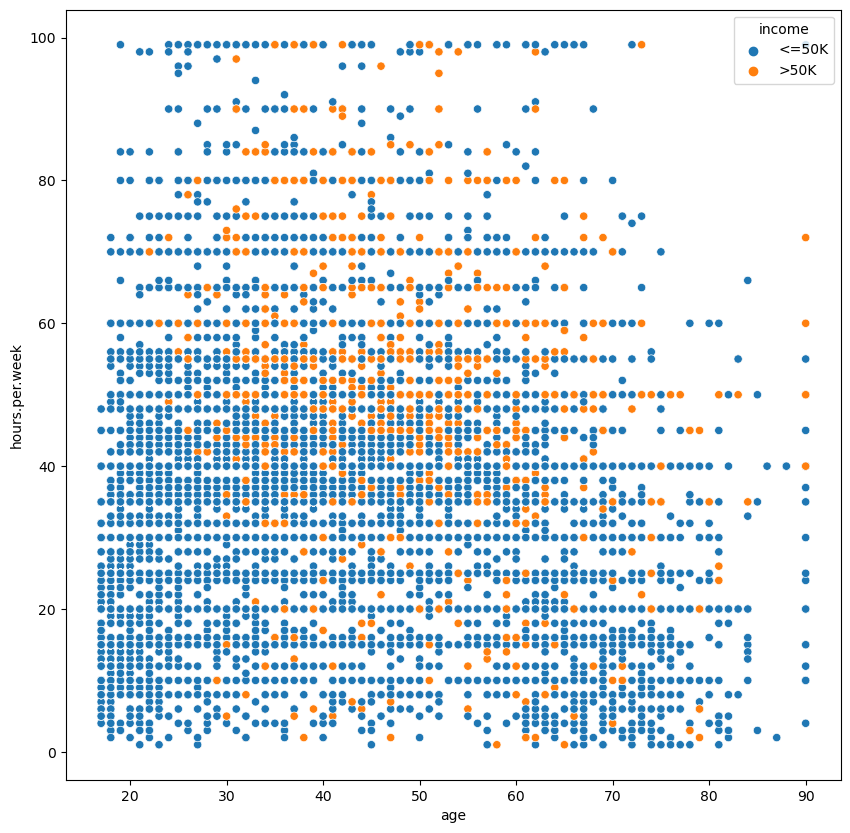

In [129]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="age",y="hours.per.week",data=df,hue="income")
plt.show()

In [130]:
#the no of people with income <50 k is more than than those of <50k.
#the working age group is concentrated between 20 and 60 
#the average hours of the population is between 30 to 60 hrs per week


<Axes: xlabel='income'>

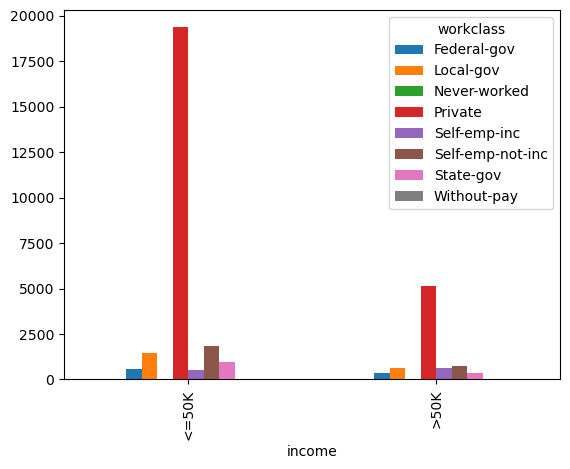

In [131]:
class_salary = pd.crosstab(df['income'],df['workclass'])
class_salary.plot(kind='bar')

<Axes: xlabel='income'>

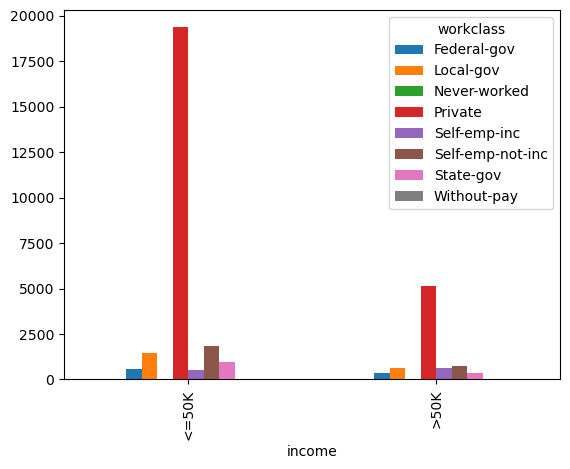

In [132]:
class_salary = pd.crosstab(df['income'],df['workclass'])
class_salary.plot(kind='bar')

In [133]:
num_cols=df.columns[df.dtypes=="int64"]

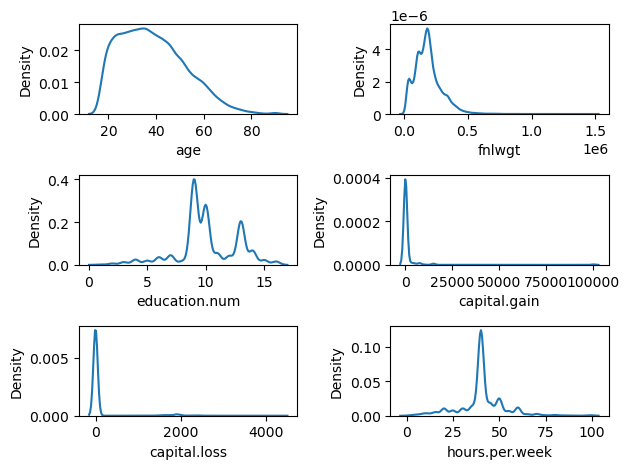

In [134]:
for i in range(len(num_cols)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(x=df[num_cols[i]])
    plt.xlabel(num_cols[i])
    plt.tight_layout()

C:\Users\91880\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


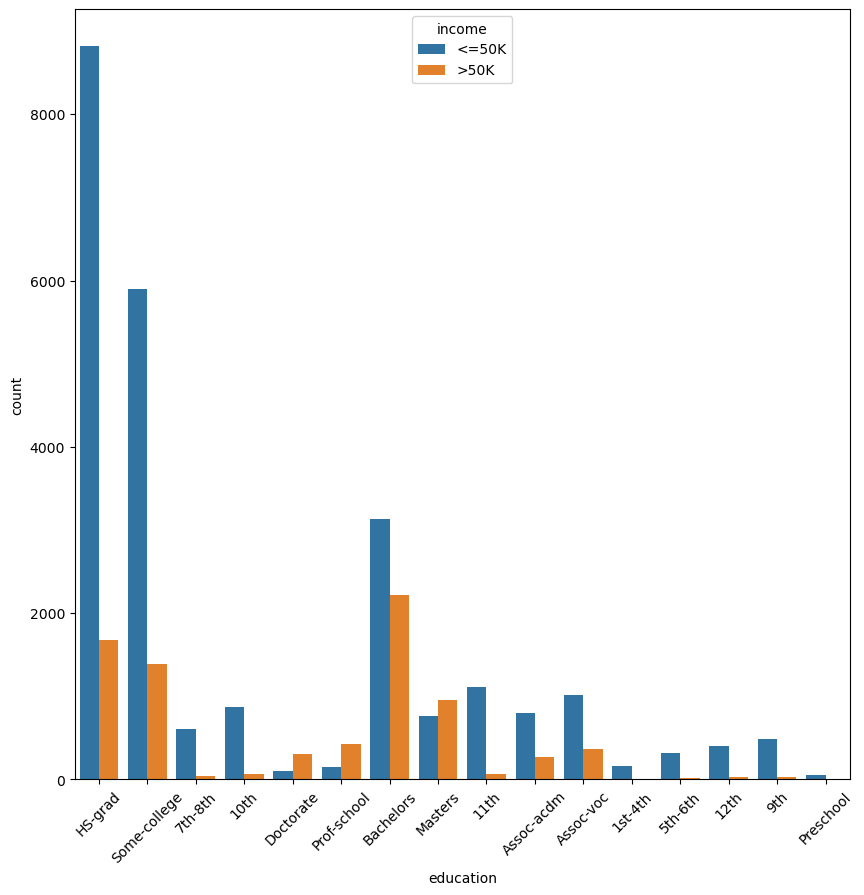

In [135]:
plt.figure(figsize=(10,10))
sns.countplot(df['education'],hue=df["income"])
plt.xticks(rotation=45)
plt.show()

In [136]:
#the people with bacelors degree are among the highest to earn the salary >50k.
#people with HS_grad are more than any other educatoon nackground people


In [137]:
#Multicollinearity

<Axes: >

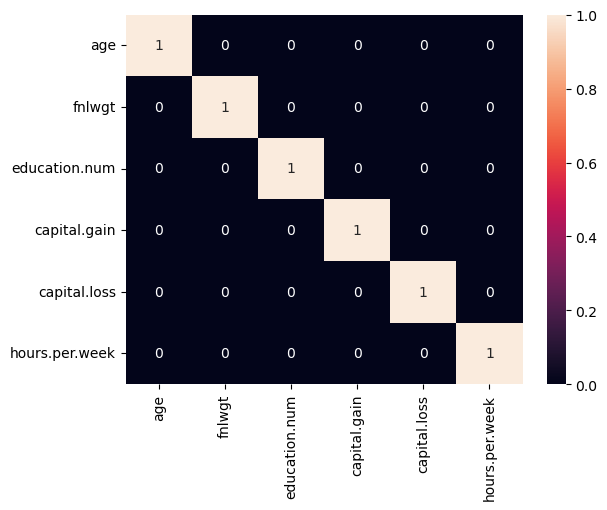

In [138]:
sns.heatmap(df[num_cols].corr()>0.75,annot=True)

In [139]:
#as it is evident that there are no collinerity among the features

In [140]:
cat_col=['workclass','occupation','race','sex','native.country',"marital.status",'relationship']

In [141]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['income'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,occupation,Reject Null Hypothesis
2,race,Reject Null Hypothesis
3,sex,Reject Null Hypothesis
4,native.country,Reject Null Hypothesis
5,marital.status,Reject Null Hypothesis
6,relationship,Reject Null Hypothesis


In [142]:
#carrying out encoding of the categorical columns

In [143]:
from sklearn.preprocessing import OneHotEncoder

In [144]:
trans=OneHotEncoder()

In [145]:
y=pd.DataFrame(trans.fit_transform(df[cat_col]).toarray())

In [146]:
y.columns=trans.get_feature_names_out(cat_col)

In [147]:
df.shape

(32537, 15)

In [150]:

df.reset_index(inplace=True)

In [151]:
y.shape

(32537, 83)

In [152]:
df=pd.concat([df,y],axis=1)

In [153]:
df

,index,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native.country_Cambodia,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,39

In [154]:
pd.set_option('display.max_columns', None)

In [155]:
from sklearn.preprocessing import OrdinalEncoder

In [156]:
y=OrdinalEncoder().fit_transform(df["income"].to_numpy().reshape(-1,1))

In [157]:
df["income_tranformed"]=y

In [158]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [159]:
df["income_tranformed"]=df["income_tranformed"].astype(int)

In [160]:
#modeling

In [161]:
X=df.drop(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income','income_tranformed'],axis=1)
Y=df["income_tranformed"]

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
model=LogisticRegression()

In [166]:
model.fit(X_train,Y_train)

LogisticRegression()

In [167]:
y_pred=model.predict(X_test)

In [168]:
model.score(X_test,Y_test)

0.7979409956976029

In [169]:
model.score(X_train,Y_train)

0.7939990011141419

In [170]:
model.coef_

array([[-4.05505715e-05,  5.33498601e-06, -3.28016395e-06,
         2.15328339e-06,  2.44859621e-04,  4.16188926e-04,
         3.24535788e-06,  9.80863543e-08,  4.91561826e-08,
        -1.40196106e-09, -1.01690213e-06,  2.23814568e-07,
        -7.10002475e-09,  1.07813498e-08, -3.28918374e-09,
        -3.89044622e-07, -1.70000212e-09, -9.35581579e-08,
         6.72645818e-07, -1.32917471e-07, -1.98552007e-07,
        -2.01992379e-07, -5.60318720e-07, -2.93548647e-08,
         2.83487999e-07,  4.69354977e-08,  1.47799919e-08,
         2.20377749e-08, -7.93037014e-08, -4.78952278e-08,
        -1.81118765e-08, -3.12282664e-07, -3.63216808e-08,
        -2.32243394e-07, -1.32715380e-06,  6.80298955e-07,
        -3.57385088e-10,  3.18971474e-09, -1.49614495e-09,
        -8.41055208e-09,  4.97637524e-09, -1.38702506e-08,
        -3.22663301e-09, -1.26632980e-08,  2.84058354e-09,
         1.60301639e-09,  8.19450545e-09, -2.50125263e-09,
        -8.53122300e-09, -5.08227470e-09, -5.46196045e-1

In [171]:
# Perfomance Evaluation using metrices

In [172]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,auc,ConfusionMatrixDisplay,roc_curve,classification_report

In [173]:
confusion_matrix(Y_test,y_pred)

array([[4785,  203],
       [1112,  408]], dtype=int64)

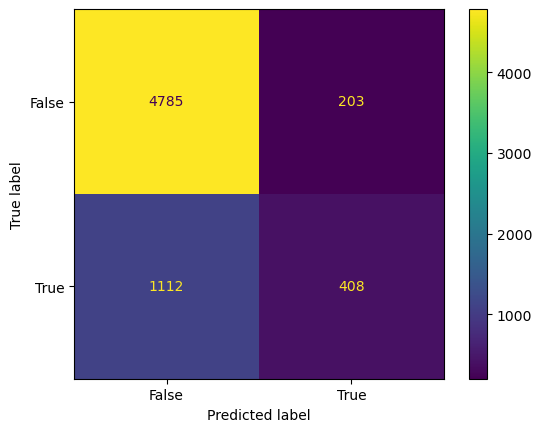

In [174]:
confusion_matrix = confusion_matrix(Y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [175]:
#precision =TP/(TP+FP)


In [176]:
precision_score(Y_test,y_pred)

0.6677577741407529

In [177]:
manually_prec=408/(408+203)

In [178]:
manually_prec

0.6677577741407529

In [179]:
#recall=TP/(TP+FN)

In [180]:
recall_score(Y_test,y_pred)

0.26842105263157895

In [181]:
manual_rec=408/(408+1112)

In [182]:
manual_rec

0.26842105263157895

In [188]:
fpr

NameError: name 'fpr_' is not defined

In [190]:
 roc_curve(Y_test,y_pred)

(array([0.        , 0.04069767, 1.        ]),
 array([0.        , 0.26842105, 1.        ]),
 array([2, 1, 0]))

In [192]:
fpr,tpr,_= roc_curve(Y_test,y_pred)

In [195]:
tpr

array([0.        , 0.26842105, 1.        ])

In [ ]:
FPR=FP/FP+TN

In [ ]:
FPR=203/(203+4785)

In [ ]:
tpr=tp/tp+fn

In [ ]:
TPR=408/(408+1112)

In [ ]:
ROC=TPR/FPR
ROC

In [ ]:
print(classification_report(Y_test,y_pred,target_names=["<50",">50"]))